퍼셉트론은 복잡한 함수도 표현할 수 있다는 장점이 있지만, 가중치를 설정을 사람이 직접 해줘야한다는 단점이 있다. 하지만, **신경망은 가중치의 적절한 값을 데이터로부터 학습한다**. 이번 장에서는 신경망에 대한 개요를 다루고 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 알아본다.

## 3.1 퍼셉트론에서 신경망으로
### 3.1.1 신경망의 예
신경망을 그림으로 나타내면 다음과 같다. 여기에서 가장 왼쪽을 **입력층**, 중간을 **은닉층**, 마지막 층을 **출력층**이라고 한다. 은닉층의 뉴런은 사람 눈에 보이지 않아 '은닉(hidden)'이라 한다. 앞으로는 입력층부터 출력층까지 차례로 0층, 1층, 2층이라 부르기로 하자.
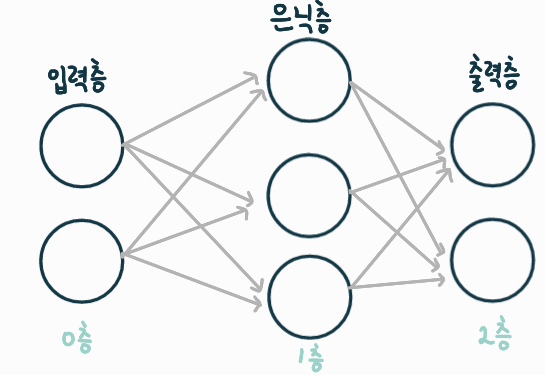

### 3.1.2 퍼셉트론 복습
아래와 같은 구조의 네트워크를 생각해보자.  
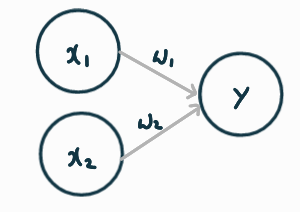  
위 그림은 $x_1$, $x_2$라는 두 입력을 받아 $y$를 출력하는 퍼셉트론이다. 이를 수식으로 나타내면 다음과 같다.  

$$\begin{align}
y = \begin{cases}
0, & \mbox{if } b + w_1 x_1 + w_2 x_2 \le 0 \\
1, & \mbox{if } b+ w_1 x_1 + w_2 x_2 > 0
\end{cases}
\end{align}$$  
여기서 $b$는 편향을 나타내는 매개변수로 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다. 반면, $w_1$, $w_2$는 가중치 매개변수로, 각 신호의 영향력을 제어한다. 만약 위 네트워크에서 편향을 명시한다면 다음과 같이 나타낼 수 있다.  
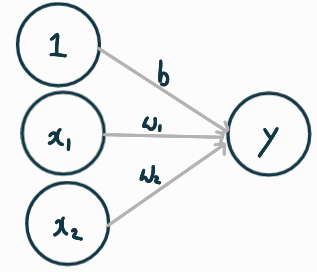

편향을 명시한 네트워크 그림에서는 입력이 $1$이고 가중치가 $b$인 뉴런이 추가됐다. 이 퍼셉트론은 3개의 신호($1$, $x_1$, $x_2$)가 입력되고 각 신호에 가중치($b$, $w_1$, $w_2$)를 곱한 뒤 다음 뉴런에 전달되는 방식으로 동작한다. 다음 뉴런에서는 이 신호들의 값을 더한 뒤 만약 0보다 작거나 같다면 0, 0보다 크다면 1을 출력한다.  
위 식을 조금 더 간결하게 표현하면 다음과 같다. 여기서 $h(x)$는 지시함수로 0보다 작거나 같으면 0, 0보다 크면 1을 반환하는 함수다.  

\begin{align}
y = h(b + w_1 x_1 + w_2 x_2)\\
h(x) = \begin{cases}
0, & \mbox{if } x \le 0 \\
1, & \mbox{if } x > 0
\end{cases}
\end{align}

### 3.1.3 활성화 함수의 등장
앞서 살펴본 $h(x)$처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 **활성화 함수(activation function)**라고 한다. 활성화 함수는 이름에서 보듯 입력 신호의 총합이 활성화를 일으키는지 여부를 결정하는 역할을 한다. 식 (2)는 입력 신호와 가중치 곱의 총합을 계산한 뒤, 활성화 함수에 입력해 결과를 내는 과정을 따른다. 따라서 이를 두 개의 식으로 나누면 아래와 같다.
\begin{equation}
a = b + w_1 x_1 + w_2 x_2
\end{equation}
\begin{equation}
y = h(a)
\end{equation}

이러한 과정을 자세히 나타낸 그림은 다음과 같다.  
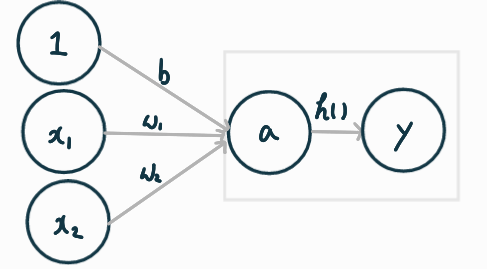

즉, 뉴런의 원을 키운 다음 활성화 함수의 처리 과정을 명시적으로 표시했다. 가중치 신호를 조합한 결과가 $a$라는 노드가 도고, 활성화 함수 $h()$를 통과하여 $y$라는 노드로 변환된다. 

## 3.2 활성화 함수
식 (2)의 $h()$와 같은 활성화 함수는 임계값을 경계로 출력이 변하므로 **계단 함수(step function)**라고 한다. 즉 "퍼셉트론에서는 활성화 함수로 계단 함수를 사용한다."라고 할 수 있다. 이외에도 활성화 함수는 여러 종류가 있는데 하나씩 살펴보자. 활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 퍼셉트론과 신경망의 큰 차이점 중 하나이다.

### 3.2.1 시그모이드 함수
시그모이드 함수(sigmoid function)은 다음과 같다.  

\begin{equation}
h(x) = \frac{1}{1+exp(-x)}
\end{equation}

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 이를 다음 뉴런에 전달한다. 그럼 시그모이드 함수와 계단 함수를 비교하며 자세히 살펴보자.

### 3.2.2 계단 함수 구현하기
함수의 형태를 직접 그림으로 그려보면 그 함수를 이해하는 데 도움이 되므로 구현해보자.

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

위 구현은 input x가 실수일 때만 가능하므로, 이를 넘파이 배열도 지원하도록 수정해보자.

In [2]:
def step_function1(x):
    y = x > 0             # 각 원소에 대해 부등호 연산 수행(bool 반환)
    return y.astype(int)  # True면 1, False면 0

def step_function(x):
    return np.array(x>0, dtype=int)

In [3]:
# example of step function
import numpy as np
x = np.array([-2.0, 1.0, 3.0])
print(x)
print(step_function(x))
print(step_function1(x))

[-2.  1.  3.]
[0 1 1]
[0 1 1]


### 3.2.3 시그모이드 함수 구현하기
시그모이드 함수는 정의에 따라 다음과 같이 구현할 수 있다.

In [4]:
def sigmoid_function(x):
    return 1 / (1+np.exp(-x))

이 경우, 계단 함수의 구현과는 달리 넘파이의 브로드캐스트 덕분에 따로 넘파이 배열을 처리하도록 수정할 필요가 없다. 즉, 구체적으로 살펴보면, `np.exp(-x)`에서 넘파이 배열을 반환하고 `1 / (1 + np.exp(-x))`도 넘파이 배열을 반환한다. 아래 예를 살펴보자.

In [5]:
x = np.array([-2.0, 1.0, 3.0])
sigmoid_function(x)

array([0.11920292, 0.73105858, 0.95257413])

### 3.2.4 계단 함수와 시그모이드 함수의 비교
이제 matplotlib 라이브러리를 활용해 계단 함수와 시그모이드 함수를 시각화해보고 차이를 살펴보자.

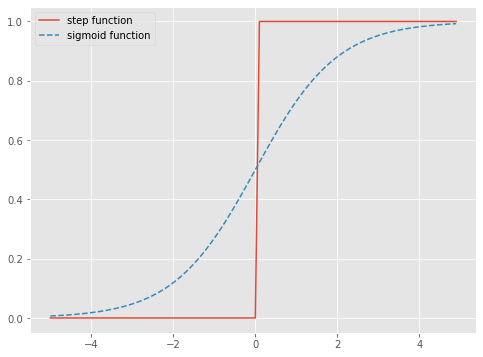

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

plt.figure(figsize=(8,6))
x = np.arange(-5.0, 5.0, 0.1)
y_step = step_function(x)
y_sigmoid = sigmoid_function(x)
plt.plot(x, y_step, label='step function')
plt.plot(x, y_sigmoid, linestyle='--', label='sigmoid function')
plt.legend()
plt.show()

계단 함수와 시그모이드 함수는 단조 증가 함수라는 **공통점**이 있다. 즉, 입력이 커질수록 출력이 같거나 증가하는 모습을 갖는다. 또한, 출력의 범위가 0부터 1까지라는 점도 동일하다.  
그러나, '매끄러움'이라는 부분에서 **차이점**이 있다. 즉, 계단 함수는 0과 1 중 하나의 값만 출력하는 반면, 시그모이드 함수는 출력이 연속적으로 변화한다.

### 3.2.5 비선형 함수
계단 함수와 시그모이드 함수는 **비선형** 함수라는 공통점도 있다. 여기서 잠시 선형 함수와 비선형 함수에 대해 짚고 가자면, **선형 함수(linear function)**란 출력이 입력의 상수배인 함수를 말한다. 즉, $f(x)=ax+b$의 형태를 선형 함수라고 부른다. 반면, **비선형 함수(non-linear function)**는 '선형이 아닌' 함수를 말한다.  
  
신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 왜냐하면 활성화 함수로 선형 함수를 사용 시 층의 의미가 사라지기 때문이다. 예를 들어, 활성화 함수 $h(x)=ax$를 사용한 노드 한 개의 3층 네트워크를 생각해보자. 이때 출력층은 $y = h(h(h(x)))$로 나타낼 수 있다. 그런데 이는 결국 $y = a \times a \times ax$이며 활성화 함수 $h(x)=cx,~~~where~~c=a^3$로 은닉층이 없는 네트워크로 표현할 수 있다. 따라서, 층을 쌓는 효과를 얻기 위해서는 비선형 함수를 활성화 함수로 사용해야 한다.  
  
### 3.2.6 ReLU 함수
ReLU(Rectified Linear Unit)는 입력이 0을 넘으면 그대로 출력하고, 0 이하면 0을 출력하는 함수로 다음과 같이 쓸 수 있다.  

\begin{equation}
h(x) = \begin{cases}
x, & \mbox{if } x > 0 \\
0, & \mbox{if } x \le 0
\end{cases}
\end{equation}  
  
다음과 같이 구현할 수 있으며, `np.maximum()`함수는 두 입력 중 큰 값을 선택해 반환하는 함수다.

In [7]:
def relu(x):
    return np.maximum(0, x)

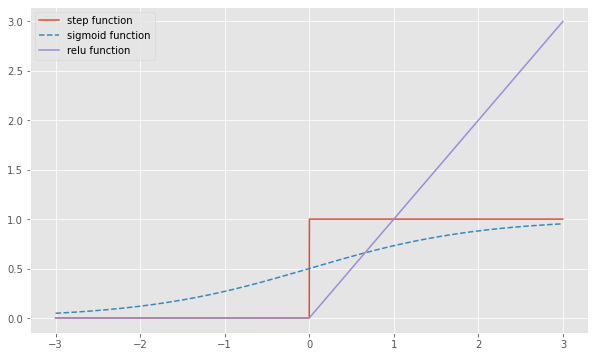

In [8]:
# plot
plt.figure(figsize=(10,6))
x = np.arange(-3.0, 3.0, 0.001)
y_step = step_function(x)
y_sigmoid = sigmoid_function(x)
y_relu = relu(x)
plt.plot(x, y_step, label='step function')
plt.plot(x, y_sigmoid, linestyle='--', label='sigmoid function')
plt.plot(x, y_relu, label='relu function')
plt.legend()
plt.show()